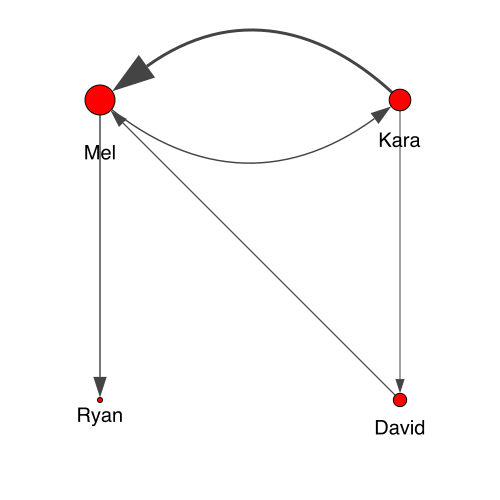

In [45]:
import numpy as np

from collections import Counter
from igraph import Graph, plot
from sklearn.preprocessing import MinMaxScaler

edges = Counter({
    ('Kara', 'David'): 5,
    ('David', 'Mel'): 10,
    ('Mel', 'Kara'): 15,
    ('Kara', 'Mel'): 50,
    ('Mel', 'Ryan'): 15,
})

g = Graph().as_directed()

vertices = set()
for n1, n2 in edges.keys():
    vertices.update([n1, n2])
    
g.add_vertices(list(vertices))

for (n1, n2), weight in edges.items():
    g.add_edge(n1, n2, weight=weight)
    
weights = np.array(g.es['weight']).reshape(-1, 1)
degrees = np.array(g.degree()).reshape(-1, 1)

arrow_size_scaler = MinMaxScaler((1, 3))
arrow_sizes = arrow_size_scaler.fit_transform(weights)

edge_width_scaler = MinMaxScaler((1, 3))
edge_widths = edge_width_scaler.fit_transform(weights)

vertex_size_scaler = MinMaxScaler((5, 30))
vertex_sizes = vertex_size_scaler.fit_transform(degrees)

plot(
    g,
    vertex_label_size=20,
    vertex_label_dist=3,
    edge_arrow_size=arrow_sizes,
    edge_width=edge_widths,
    vertex_size=vertex_sizes,
    vertex_label=g.vs['name'],
    layout=g.layout_grid(),
    margin=100,
    bbox=(500, 500),
)